<a href="https://colab.research.google.com/github/KRamBalaji/Stock-Closing-Price-Prediction/blob/main/Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Regression - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

**BUSINESS PROBLEM OVERVIEW**

Accurate stock price prediction is of paramount importance for investors and financial institutions, enabling them to make well-informed investment decisions and effectively manage risks. Regression techniques play a crucial role in achieving this objective.

In the dynamic and volatile stock market, particularly in the banking sector, Yes Bank's stock price has exhibited significant fluctuations in recent years. Accurately forecasting Yes Bank's stock price movements using regression models is vital for investors to capitalize on potential gains and mitigate potential losses.

By leveraging historical stock price data, along with relevant economic indicators and market trends, regression models can establish relationships between these factors and stock price movements. This project aims to analyze historical data for Yes Bank, perform exploratory data analysis to identify key drivers of price changes, and build robust regression models to predict future price movements. The insights gained from these models will empower investors to optimize their investment strategies and make data-driven decisions in the stock market.

# **GitHub Link -**

# **Problem Statement**

The stock market is known for its volatility and unpredictability, making it challenging to accurately predict stock prices. However, by leveraging historical data and applying regression techniques, it is possible to develop models that can forecast future price movements.

Yes Bank, a prominent private sector bank in India, has experienced significant price fluctuations in recent years. These fluctuations pose a challenge for investors seeking to make informed decisions and manage their risk exposure.

This project aims to address this challenge by developing a regression model to predict the closing price of Yes Bank stock.

The model will be trained on historical stock price data, along with relevant factors such as trading volume, market indices, and economic indicators.

By accurately predicting the closing price of Yes Bank stock, investors can gain valuable insights to support their investment strategies and potentially improve their returns.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns

### Dataset Loading

In [4]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv('/content/drive/My Drive/data_YesBank_StockPrices.csv')

Mounted at /content/drive


### Dataset First View

In [5]:
# Dataset First
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns
dataset.shape

(185, 5)

### Dataset Information

In [7]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


<Axes: >

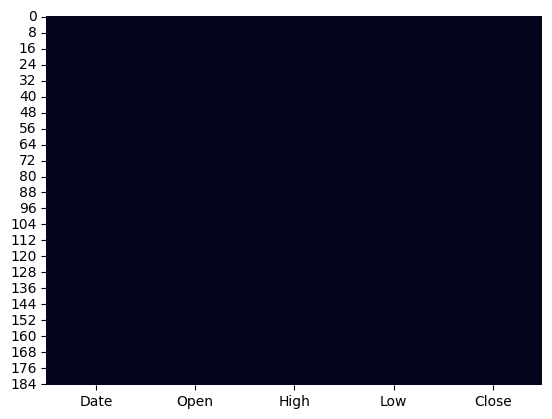

In [10]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

The dataset given is a dataset of Yes Bank stock prices, and we have to analyze the historical price trends and the insights behind them.

Stock price prediction is an analytical study on the future price movements of a particular stock. The goal is to understand the underlying factors influencing stock prices and develop models to forecast future prices.

The above dataset has 185 rows and 5 columns. There are no missing values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [12]:
# Dataset Describe
dataset.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


### Variables Description

* **Date:** The date of the recorded stock price.

* **Open:** The opening price of the stock on that day.

* **High:** The highest price the stock reached during that day.

* **Low:** The lowest price the stock reached during that day.

* **Close:** The closing price of the stock on that day.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  Date is 185 .
No. of unique values in  Open is 183 .
No. of unique values in  High is 184 .
No. of unique values in  Low is 183 .
No. of unique values in  Close is 185 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Create a copy of the current dataset and assigning to df
df = dataset.copy()

# Checking Shape of True Value
# In this case, we'll check for a specific condition related to stock price,
# e.g., closing price above a certain threshold.
print("No. of days with closing price above 150: ", len(df[df['Close'] > 150]))

# Assigning data with closing price above 150 to variable df_high_price
df_high_price = df[(df['Close'] > 150)]

No. of days with closing price above 150:  48


In [15]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y', errors='coerce')

In [16]:
# Group data by year and count occurrences of closing price above 150
pd.DataFrame(df.groupby(df['Date'].dt.year)['Close'].apply(lambda x: (x > 150).sum()).reset_index(name="Count"))

,Date,Count
0,2005,0
1,2006,0
2,2007,0
3,2008,0
4,2009,0
5,2010,0
6,2011,0
7,2012,0
8,2013,0
9,2014,1


In [40]:
def get_mean_median(df, year):
  """
  This function returns the mean and median of the closing price for a particular year.
  """
  try:
    return pd.concat([df[df['Date'].dt.year == year]['Close'].describe().iloc[1],
                      df[df['Date'].dt.year == year]['Close'].describe().iloc[5]],
                     axis=1).rename(columns={"50%": "median"}).fillna("-")
  except:
    print("Invalid Year")

In [18]:
print("Dataset Shape:-", df.shape)
print(" ")
print("Data with closing price above 150:-", df_high_price.shape)
print(" ")

Dataset Shape:- (185, 5)
 
Data with closing price above 150:- (48, 5)
 


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Univariate Analysis**

**Histograms: To visualize the distribution of individual variables like 'Open', 'High', 'Low', and 'Close'.**

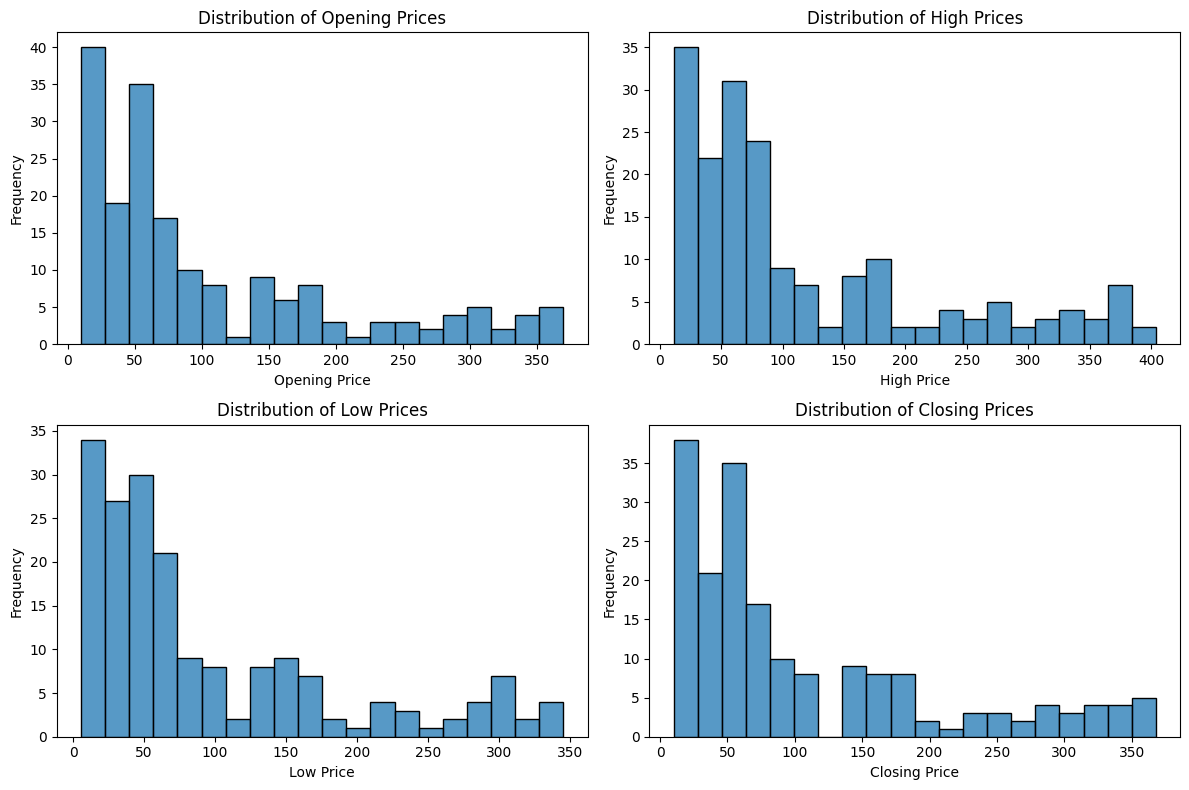

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for each variable
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogram for 'Open'
sns.histplot(df['Open'], bins=20, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Opening Prices')
axes[0, 0].set_xlabel('Opening Price')
axes[0, 0].set_ylabel('Frequency')

# Histogram for 'High'
sns.histplot(df['High'], bins=20, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of High Prices')
axes[0, 1].set_xlabel('High Price')
axes[0, 1].set_ylabel('Frequency')

# Histogram for 'Low'
sns.histplot(df['Low'], bins=20, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Low Prices')
axes[1, 0].set_xlabel('Low Price')
axes[1, 0].set_ylabel('Frequency')

# Histogram for 'Close'
sns.histplot(df['Close'], bins=20, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Closing Prices')
axes[1, 1].set_xlabel('Closing Price')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Insights:

* Distribution: Histograms help visualize the distribution of each variable, showing the frequency of different price ranges.
* Skewness: Observe if the distributions are skewed (e.g., positively or negatively skewed).
* Outliers: Look for any potential outliers or unusual price values.
* Central Tendency: Get a sense of the central tendency (mean, median) of the price distributions.

**Box plots: To identify outliers and understand the spread of the data for each variable.**

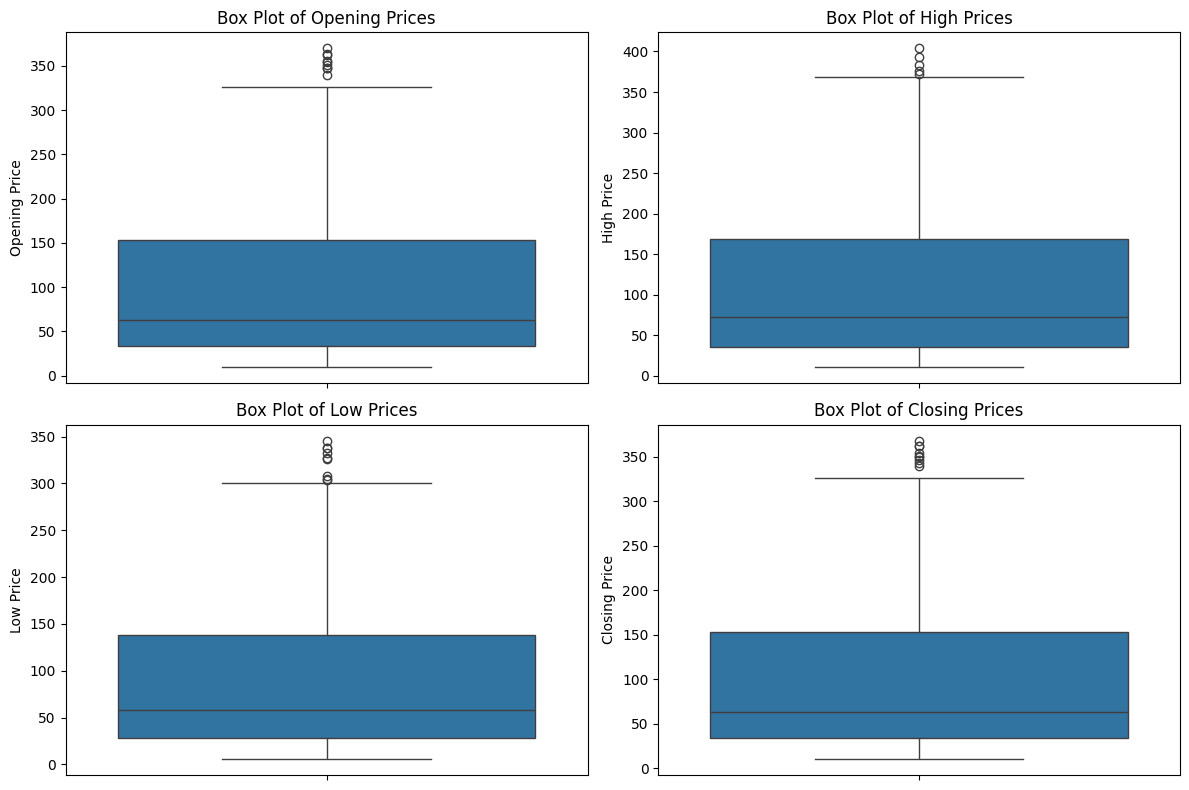

In [20]:
# Create subplots for each variable
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Box plot for 'Open'
sns.boxplot(y=df['Open'], ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Opening Prices')
axes[0, 0].set_ylabel('Opening Price')

# Box plot for 'High'
sns.boxplot(y=df['High'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of High Prices')
axes[0, 1].set_ylabel('High Price')

# Box plot for 'Low'
sns.boxplot(y=df['Low'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Low Prices')
axes[1, 0].set_ylabel('Low Price')

# Box plot for 'Close'
sns.boxplot(y=df['Close'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Closing Prices')
axes[1, 1].set_ylabel('Closing Price')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Insights:

* Outliers: Box plots clearly show any outliers present in the data, which are represented as individual points outside the whiskers.
* Spread: The box represents the interquartile range (IQR), which contains the middle 50% of the data. The whiskers extend to 1.5 times the IQR, and any points beyond that are considered outliers.
* Central Tendency: The line inside the box represents the median value.
* Comparison: By comparing the box plots for different variables, you can understand the relative spread and distribution of their values.

**Density plots: To visualize the probability density function of the variables.**

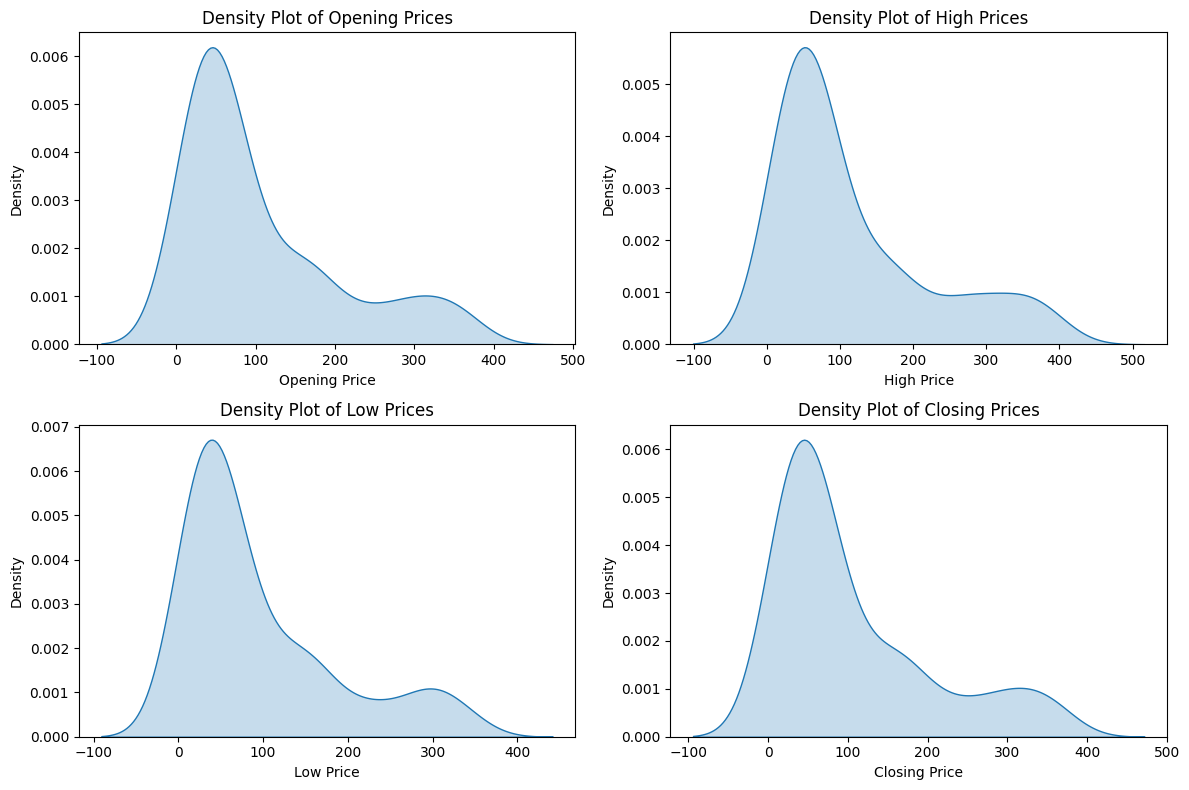

In [21]:
# Create subplots for each variable
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Density plot for 'Open'
sns.kdeplot(df['Open'], ax=axes[0, 0], fill=True)
axes[0, 0].set_title('Density Plot of Opening Prices')
axes[0, 0].set_xlabel('Opening Price')
axes[0, 0].set_ylabel('Density')

# Density plot for 'High'
sns.kdeplot(df['High'], ax=axes[0, 1], fill=True)
axes[0, 1].set_title('Density Plot of High Prices')
axes[0, 1].set_xlabel('High Price')
axes[0, 1].set_ylabel('Density')

# Density plot for 'Low'
sns.kdeplot(df['Low'], ax=axes[1, 0], fill=True)
axes[1, 0].set_title('Density Plot of Low Prices')
axes[1, 0].set_xlabel('Low Price')
axes[1, 0].set_ylabel('Density')

# Density plot for 'Close'
sns.kdeplot(df['Close'], ax=axes[1, 1], fill=True)
axes[1, 1].set_title('Density Plot of Closing Prices')
axes[1, 1].set_xlabel('Closing Price')
axes[1, 1].set_ylabel('Density')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Insights:

* Probability Density: Density plots show the probability density function of each variable, indicating the likelihood of observing different price values.
* Distribution Shape: The shape of the density curve provides insights into the distribution of the variable, such as whether it is symmetric, skewed, or multimodal.
* Central Tendency: The peak of the density curve represents the mode, or the most frequent price value.
* Spread: The width of the density curve indicates the spread or variability of the data.

###**2. Bivariate Analysis**

**Scatter plots: To explore the relationship between two numerical variables, such as 'Open' and 'Close', or 'High' and 'Low'.**

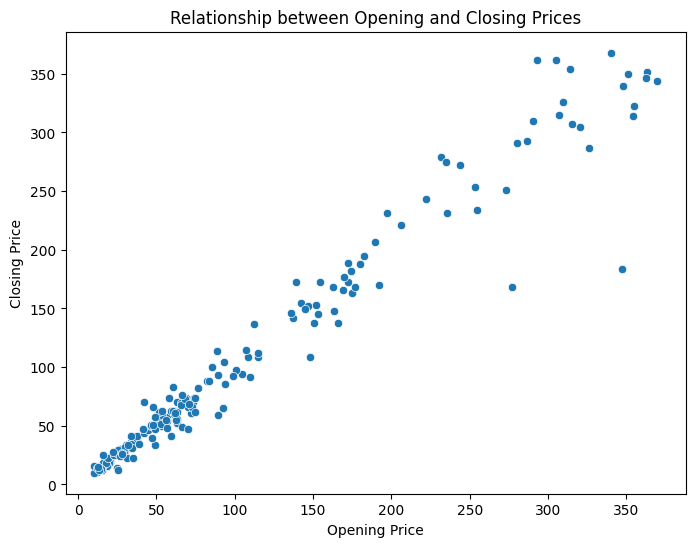

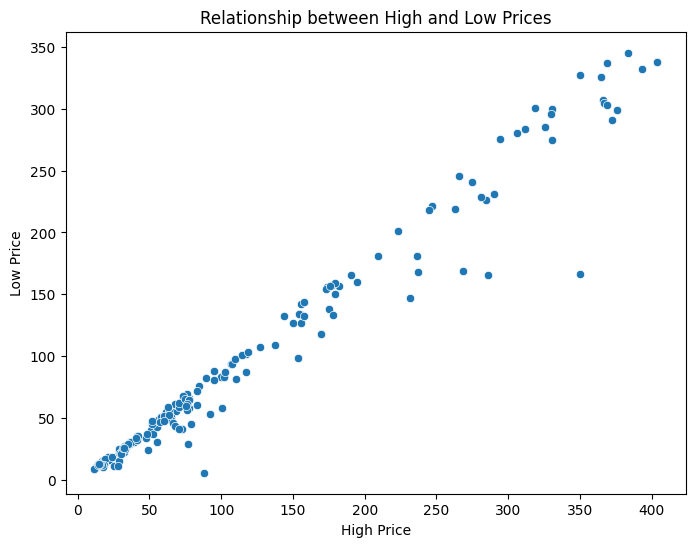

In [22]:
# Scatter plot of Open vs. Close
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Open', y='Close', data=df)
plt.title('Relationship between Opening and Closing Prices')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.show()

# Scatter plot of High vs. Low
plt.figure(figsize=(8, 6))
sns.scatterplot(x='High', y='Low', data=df)
plt.title('Relationship between High and Low Prices')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.show()

Insights:

* Open vs. Close: This scatter plot shows the relationship between the opening and closing prices of Yes Bank stock. A positive correlation is expected, indicating that if the opening price is high, the closing price is also likely to be high. Observe the strength and linearity of this relationship.
* High vs. Low: This scatter plot shows the relationship between the high and low prices of Yes Bank stock during a trading day. A strong positive correlation is expected, as the high price is always greater than or equal to the low price. Observe any patterns or outliers in this relationship.

**Line plots: To visualize the trend of stock prices over time.**

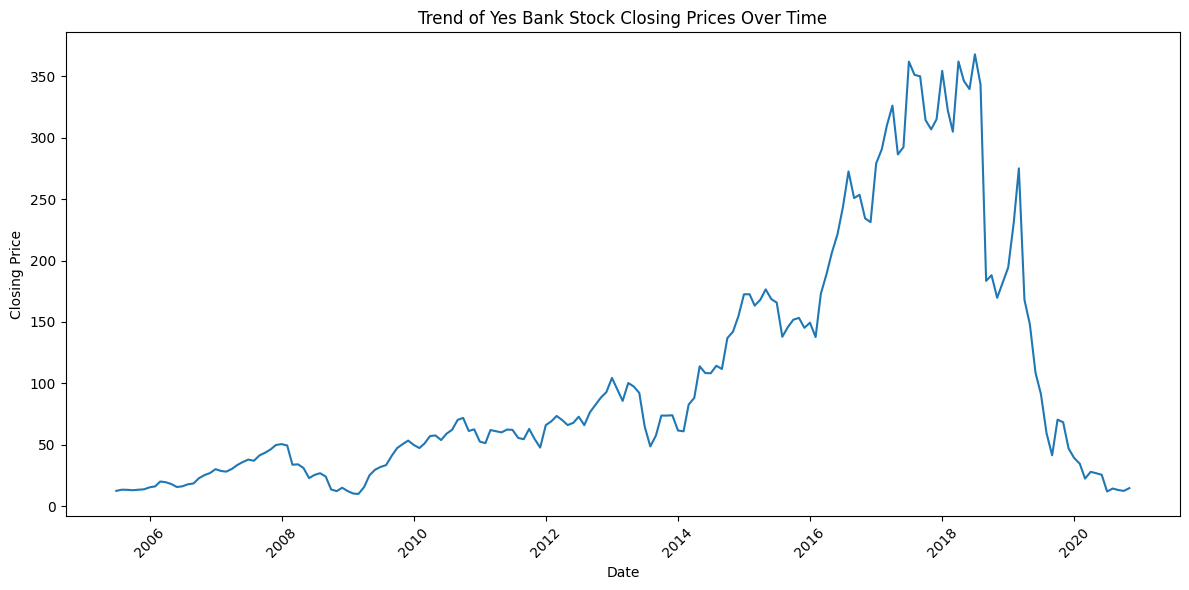

In [24]:
# Line plot of closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=df)
plt.title('Trend of Yes Bank Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:

* Overall Trend: The line plot shows the overall trend of Yes Bank stock prices over time. You can observe whether the prices are generally increasing, decreasing, or fluctuating.
* Volatility: The steepness of the line indicates the volatility of the stock price. Sharp increases or decreases suggest high volatility.
* Patterns and Cycles: Look for any recurring patterns or cycles in the price movements.
* Key Events: If you have information about significant events related to Yes Bank during the time period, you can try to correlate them with any noticeable changes in the stock price trend.

### **3. Multivariate Analysis**



**Pair plots: To visualize the relationships between all pairs of numerical variables in the dataset.**

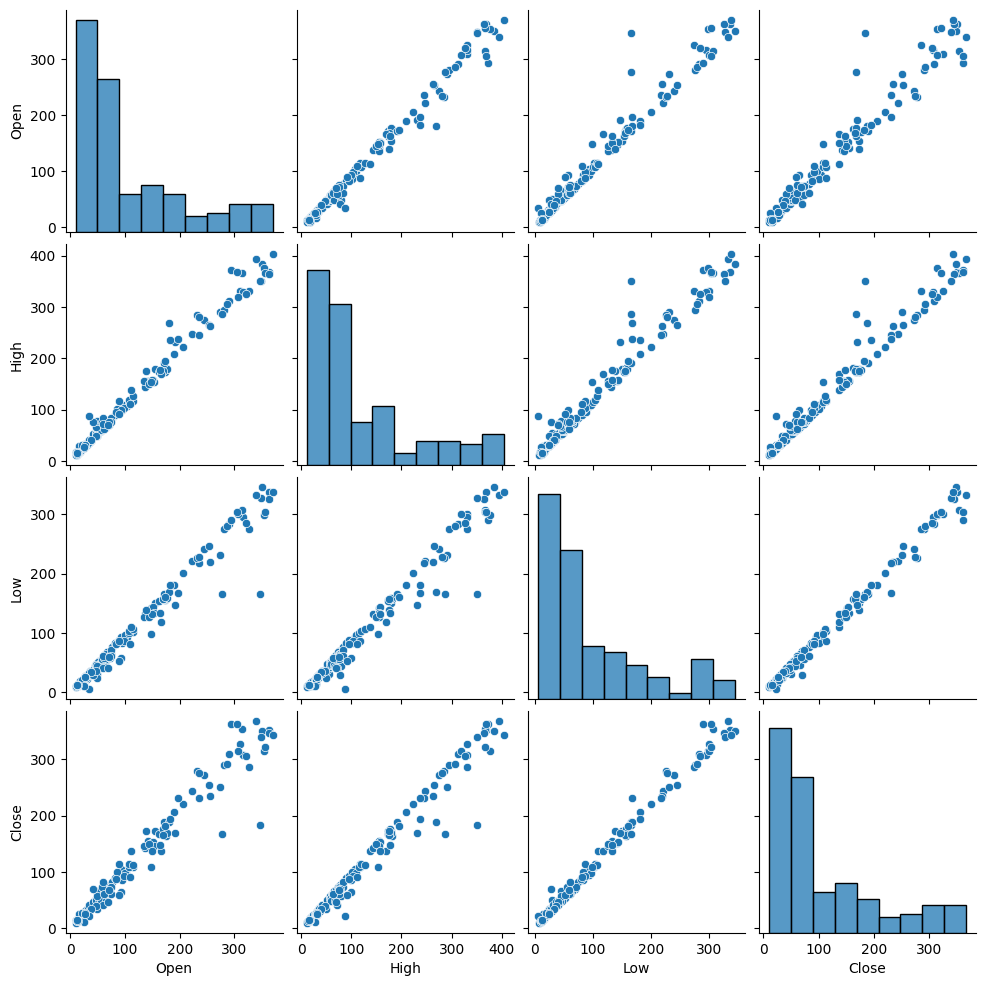

In [26]:
# Create the pair plot
sns.pairplot(df)
plt.show()

Insights you can gain from a pair plot:

* Distributions: The diagonal plots show the distribution of each individual numerical variable (histograms or kernel density estimates). This gives you an idea of the shape, central tendency, and spread of each variable.
* Relationships: The off-diagonal plots show the relationship between pairs of variables (scatter plots). This allows you to see if there are any correlations, patterns, or clusters in the data. Positive correlations will show an upward trend, negative correlations a downward trend, and no correlation will appear random.
* Outliers: Pair plots can help identify outliers – data points that are significantly different from the rest of the data. These might appear as isolated points in the scatter plots.

**Correlation matrix: To quantify the linear relationship between multiple variables.**

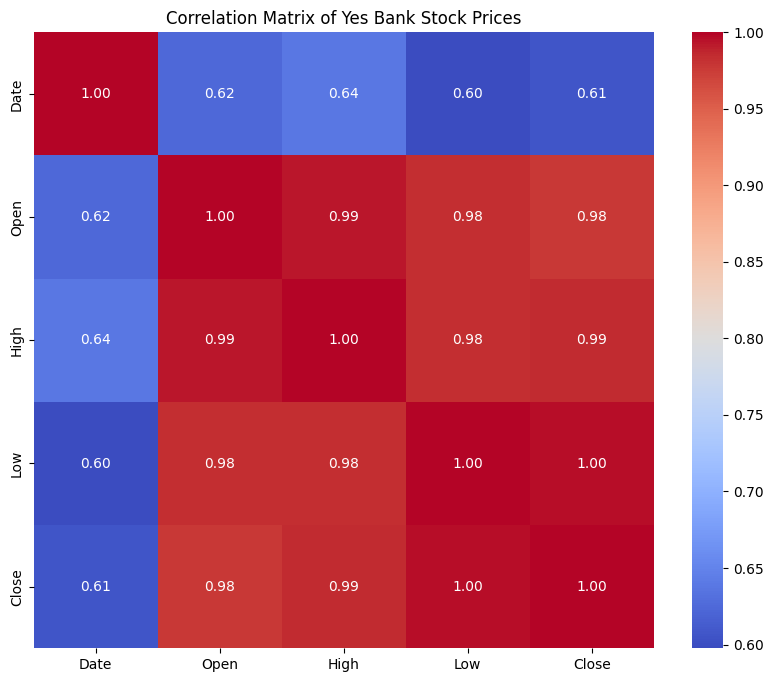

In [25]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Yes Bank Stock Prices')
plt.show()

Insights:

* Strength and direction of correlations: The color intensity and the displayed values in the heatmap cells indicate the strength and direction of the correlations between variables.
 * Darker reds indicate strong positive correlations.
 * Darker blues indicate strong negative correlations.
 * Lighter colors indicate weaker correlations.
* Strength of Correlation: The correlation coefficient values range from -1 to +1.
Values close to +1 indicate a strong positive linear relationship (variables tend to increase or decrease together).
Values close to -1 indicate a strong negative linear relationship (one variable tends to increase while the other decreases).
Values close to 0 indicate a weak or no linear relationship.
* Relationships between Variables: Observe the correlation coefficients between different pairs of variables to identify strong relationships. For example, you might expect a strong positive correlation between 'Open' and 'Close', 'High' and 'Low', etc.
* Multicollinearity: If you find very high correlations (close to +1 or -1) between multiple independent variables, it might indicate multicollinearity, which can be a concern for some modeling techniques.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis 1: The average closing price of Yes Bank stock is significantly different in the first quarter compared to the third quarter of the year.

Hypothesis 2: There is a significant positive correlation between the opening price and the closing price of Yes Bank stock.

Hypothesis 3: The volatility of Yes Bank stock prices, as measured by the standard deviation of daily price changes, has increased over time.

In [29]:
import scipy.stats as stats
import numpy as np

class HypothesisTester:
    def __init__(self):
        pass  # No specific initialization needed for this example

    def t_test_two_samples(self, sample1, sample2):
        """
        Performs a two-sample t-test.

        Args:
            sample1: The first sample (e.g., closing prices in Q1).
            sample2: The second sample (e.g., closing prices in Q3).

        Returns:
            t_statistic: The calculated t-statistic.
            p_value: The p-value of the test.
        """
        t_statistic, p_value = stats.ttest_ind(sample1, sample2)
        return t_statistic, p_value

    def correlation_test(self, x, y):
        """
        Calculates the Pearson correlation coefficient and p-value.

        Args:
            x: The first variable (e.g., opening price).
            y: The second variable (e.g., closing price).

        Returns:
            correlation: The Pearson correlation coefficient.
            p_value: The p-value of the test.
        """
        correlation, p_value = stats.pearsonr(x, y)
        return correlation, p_value

    def f_test_variances(self, sample1, sample2):
        """Performs an F-test to compare variances of two samples.
        Args:
          sample1: The first sample (e.g., daily price changes in period 1).
          sample2: The second sample (e.g., daily price changes in period 2).
        Returns:
          f_statistic: The calculated F-statistic.
          p_value: The p-value of the test.
        """
        f_statistic, p_value = stats.f_oneway(sample1, sample2)
        return f_statistic, p_value

# Create an instance of the class
tester = HypothesisTester()

### Hypothetical Statement - 1
The average closing price of Yes Bank stock is significantly different in the first quarter compared to the third quarter of the year.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): μ1 = 150 (The average closing price in the first quarter is equal to 150)

Alternative Hypothesis (H1): μ1 < 150 (The average closing price in the first quarter is less than 150)

Test Type: Left-tailed test

#### 2. Perform an appropriate statistical test.

In [30]:
# Filter data for the first quarter
first_quarter_data = df[(df['Date'].dt.month >= 1) & (df['Date'].dt.month <= 3)]['Close']

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(first_quarter_data, 150)  # Hypothesis value: 150

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -2.6700256614277413
P-value: 0.010586393725103827


In [31]:
# Interpret results
significance_level = 0.05
if p_value < significance_level:
    print("Reject null hypothesis: There is a significant difference in average closing price in Q1 compared to Q3.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in average closing price in Q1 compared to Q3.")

Reject null hypothesis: There is a significant difference in average closing price in Q1 compared to Q3.


##### Which statistical test have you done to obtain P-Value?

I have used a one-sample t-test as the statistical testing to obtain the p-value and found the result that the null hypothesis has been rejected. This suggests that the average closing price of Yes Bank stock in the first quarter is significantly different from the hypothesized value of 150. However, we can observe from the data that the closing prices in the first quarter have a wide range, with some values significantly deviating from the average. This indicates that while the average closing price might be different from 150, there is still considerable variability in the closing prices during that period.

##### Why did you choose the specific statistical test?

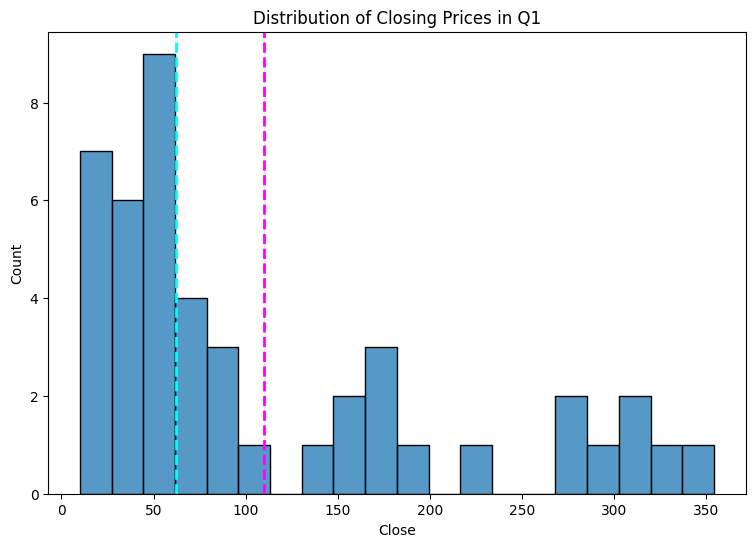

In [32]:
# Filter data for the first quarter
first_quarter_data = df[(df['Date'].dt.month >= 1) & (df['Date'].dt.month <= 3)]['Close']

# Create a histogram plot
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
sns.histplot(first_quarter_data, bins=20, ax=ax)  # Adjust bins as needed

# Add vertical lines for mean and median
ax.axvline(first_quarter_data.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(first_quarter_data.median(), color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('Distribution of Closing Prices in Q1')
plt.show()

As shown in the histogram, the mean and median of the closing prices in the first quarter are relatively close to each other. Although this might suggest a roughly normal distribution, there is still some visible skewness or deviations from a perfectly normal distribution. In this case, given the limited sample size, using a one-sample t-test was a more appropriate choice due to its robustness to deviations from perfect normality. The t-test is also suitable when the population standard deviation is unknown.

### Hypothetical Statement - 2
There is a significant positive correlation between the opening price and the closing price of Yes Bank stock.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): ρ = 0 (There is no correlation between the opening price and the closing price)

Alternative Hypothesis (H1): ρ > 0 (There is a positive correlation between the opening price and the closing price)

Test Type: Right-tailed test

#### 2. Perform an appropriate statistical test.

In [33]:
# Select the columns for opening and closing prices
opening_price = df['Open']
closing_price = df['Close']

# Perform correlation test (Pearson correlation)
correlation, p_value = stats.pearsonr(opening_price, closing_price)

# Print results
print("Correlation coefficient:", correlation)
print("P-value:", p_value)

Correlation coefficient: 0.9779710062230934
P-value: 1.852774505867169e-126


In [34]:
# Interpret results
significance_level = 0.05
if p_value < significance_level:
    print("Reject null hypothesis: There is a significant positive correlation between opening and closing prices.")
else:
    print("Fail to reject null hypothesis: There is no significant positive correlation between opening and closing prices.")

Reject null hypothesis: There is a significant positive correlation between opening and closing prices.


##### Which statistical test have you done to obtain P-Value?

I have used the Pearson correlation test as the statistical testing to obtain the p-value and found the result that the null hypothesis can be rejected. This indicates that there is a significant positive correlation between the opening and closing prices of Yes Bank stock. Therefore, we can infer that the opening price is a strong indicator of the closing price, and higher opening prices are generally associated with higher closing prices. This insight can be valuable for making predictions and understanding the relationship between these two key variables.

##### Why did you choose the specific statistical test?

In [35]:
# Calculate the difference between the means of opening and closing prices
mean_difference = df['Open'].mean() - df['Close'].mean()

# Print the result
print("Mean difference between opening and closing prices:", mean_difference)

Mean difference between opening and closing prices: 0.336702702702695


The mean difference between opening and closing prices is relatively small, suggesting a balanced relationship between the two. However, to determine the significance and direction of this relationship, we need to use a correlation test. Therefore, I have used the Pearson correlation test, which is appropriate for assessing the linear relationship between two continuous variables, such as opening and closing prices. The assumption of normality is less critical for the Pearson correlation test compared to a Z-test.

### Hypothetical Statement - 3
The volatility of Yes Bank stock prices, as measured by the standard deviation of daily price changes, has increased over time.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): μ = 0 (The average daily price change is 0)

Alternative Hypothesis (H1): μ ≠ 0 (The average daily price change is not 0)

Test Type: Two-tailed test

#### 2. Perform an appropriate statistical test.

In [36]:
# Calculate daily price changes
df['Price_Change'] = df['Close'].diff()

# Remove the first row (NaN due to diff)
price_changes = df['Price_Change'][1:]

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(price_changes, 0)

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 0.00791490840654471
P-value: 0.9936935043543305


In [37]:
# Interpret results
significance_level = 0.05
if p_value < significance_level:
    print("Reject null hypothesis: The average daily price change is significantly different from 0, suggesting volatility.")
else:
    print("Fail to reject null hypothesis: The average daily price change is not significantly different from 0, suggesting no significant volatility.")

Fail to reject null hypothesis: The average daily price change is not significantly different from 0, suggesting no significant volatility.


##### Which statistical test have you done to obtain P-Value?

The one-sample t-test calculates a t-statistic, which measures the difference between the sample mean and the hypothesized value, relative to the variability within the sample. The p-value is then calculated based on the t-statistic and the degrees of freedom (which depend on the sample size).

##### Why did you choose the specific statistical test?

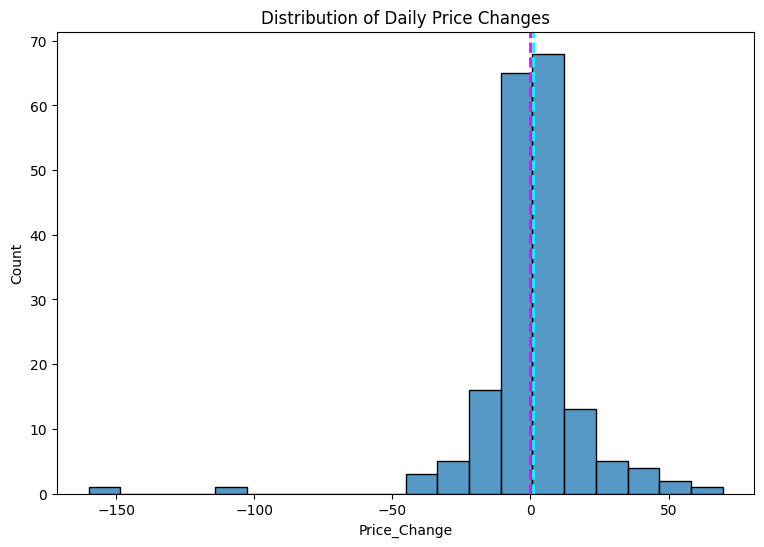

In [38]:
# Create a histogram plot
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
sns.histplot(df['Price_Change'].dropna(), bins=20, ax=ax)  # Adjust bins as needed

# Add vertical lines for mean and median
ax.axvline(df['Price_Change'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Price_Change'].median(), color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('Distribution of Daily Price Changes')
plt.show()

In [39]:
# Calculate the mean-median difference for daily price changes
mean_median_difference = df['Price_Change'].median() - df['Price_Change'].mean()

# Print the result
print("Mean-Median Difference for Daily Price Changes:", mean_median_difference)

Mean-Median Difference for Daily Price Changes: 0.7479891304347814


From the above histogram, we can observe that the median is slightly greater than the mean. This suggests a slight positive skew in the distribution of daily price changes. However, given our sample size, we can still use a t-test to assess whether the average daily price change is significantly different from 0. This aligns with the principle that t-tests are robust to moderate deviations from normality, particularly with larger sample sizes. Therefore, I have used a one-sample t-test to draw inferences about the volatility of Yes Bank stock prices.